# Examining Citi Bike Data Using SQL and Python

## Citi Bike Analytics 

### Author: Harry Patterson

                              ====================================================

## Table of Contents
### The Objective
- [What insight can we gather from this dataset?](#Objective)

### Data Quality Check
- [Simple Inspection of Data](#Datacleaning)

### Descriptive Statistics
- [Basic queries to analyze data](#Descriptive_statistics)

### Exploratory Data Analysis
- [Examine gender of users](#Eda1)
- [Examine age of users](#Eda2)
- [Examine trip duration of users](#Eda3)
- [Examine start time of users](#Eda4)
- [Examine start station names of users](#Eda5)
- [Visualizations](#Eda6)
- [Visualizations of locations](#Eda7)

### Final Remarks
- [Conclusion](#Conclusion)





***

<a id='Objective'></a>
# The Objective:

Analyzing the overall features in Citi Bike data and see what questions can be answered using the data provided.

### IMPORT PACKAGES

In [2]:
import pandas as pd
import seaborn as sns
import sqlite3
from zipfile import ZipFile
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# DATA
- Ride ID
- Rideable type
- Started at
- Ended at
- Start station name
- Start station ID
- End station name
- End station ID
- Start latitude
- Start longitude
- End latitude
- End Longitude
- Member or casual ride
- Data format previously:
- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

***

### READ THE DATA

In [4]:
# Read csv into sqlite

citi_db2 = sqlite3.connect('citibike.db')

In [5]:
pd.read_csv('https://s3.amazonaws.com/tripdata/202101-citibike-tripdata.csv.zip', nrows = 10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2513,2021-01-01 00:00:11.9020,2021-01-01 00:42:05.2260,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,47812,Customer,1969,0
1,2519,2021-01-01 00:00:15.0960,2021-01-01 00:42:14.9780,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,47571,Customer,1969,0
2,1207,2021-01-01 00:00:28.9300,2021-01-01 00:20:36.6510,3144,E 81 St & Park Ave,40.776777,-73.959010,3724,7 Ave & Central Park South,40.766741,-73.979069,37451,Subscriber,2002,1
3,2506,2021-01-01 00:00:32.7130,2021-01-01 00:42:19.3980,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,48884,Customer,2002,1
4,959,2021-01-01 00:00:35.3650,2021-01-01 00:16:34.6010,534,Water - Whitehall Plaza,40.702551,-74.012723,332,Cherry St,40.712199,-73.979481,26837,Customer,2002,1
5,2447,2021-01-01 00:01:18.3190,2021-01-01 00:42:05.8660,319,Fulton St & Broadway,40.711066,-74.009447,3314,W 95 St & Broadway,40.793770,-73.971888,35136,Subscriber,1972,1
6,1147,2021-01-01 00:01:31.7440,2021-01-01 00:20:39.5490,3144,E 81 St & Park Ave,40.776777,-73.959010,3724,7 Ave & Central Park South,40.766741,-73.979069,48135,Customer,1998,1
7,2426,2021-01-01 00:01:46.4180,2021-01-01 00:42:13.3210,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,49619,Customer,1969,0
8,128,2021-01-01 00:02:39.8230,2021-01-01 00:04:47.8720,3294,E 91 St & Park Ave,40.783502,-73.955327,3336,E 97 St & Madison Ave,40.787801,-73.953559,47945,Subscriber,1992,1
9,477,2021-01-01 00:02:42.2770,2021-01-01 00:10:40.0660,3372,E 74 St & 1 Ave,40.768974,-73.954823,3391,E 106 St & 1 Ave,40.789253,-73.939562,36267,Subscriber,1990,1


In [8]:
# only bring in the file that contains the 1 at the end
url = ('https://s3.amazonaws.com/tripdata/20210%s-citibike-tripdata.csv.zip')


for i in [1]:
    print(url % i)
    chunks = pd.read_csv(url % i, chunksize=100_000)
    for chunk in chunks:
        chunk.columns = [ column.replace(' ', '_') for column in chunk.columns]
        chunk.to_sql('tripdata_2021', citi_db2, if_exists='append')

https://s3.amazonaws.com/tripdata/202101-citibike-tripdata.csv.zip


<a id='Datacleaning'></a>
# Data Quality Check
***

In [9]:
# execute simple queries in sqlite using pandas

pd.read_sql_query('SELECT count(*) FROM tripdata_2021', citi_db2)

,count(*)
0,1095346


In [10]:
pd.read_sql_query('SELECT * FROM tripdata_2021 LIMIT 10', citi_db2)

,index,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,2513,2021-01-01 00:00:11.9020,2021-01-01 00:42:05.2260,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,47812,Customer,1969,0
1,1,2519,2021-01-01 00:00:15.0960,2021-01-01 00:42:14.9780,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,47571,Customer,1969,0
2,2,1207,2021-01-01 00:00:28.9300,2021-01-01 00:20:36.6510,3144,E 81 St & Park Ave,40.776777,-73.959010,3724,7 Ave & Central Park South,40.766741,-73.979069,37451,Subscriber,2002,1
3,3,2506,2021-01-01 00:00:32.7130,2021-01-01 00:42:19.3980,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,48884,Customer,2002,1
4,4,959,2021-01-01 00:00:35.3650,2021-01-01 00:16:34.6010,534,Water - Whitehall Plaza,40.702551,-74.012723,332,Cherry St,40.712199,-73.979481,26837,Customer,2002,1
5,5,2447,2021-01-01 00:01:18.3190,2021-01-01 00:42:05.8660,319,Fulton St & Broadway,40.711066,-74.009447,3314,W 95 St & Broadway,40.793770,-73.971888,35136,Subscriber,1972,1
6,6,1147,2021-01-01 00:01:31.7440,2021-01-01 00:20:39.5490,3144,E 81 St & Park Ave,40.776777,-73.959010,3724,7 Ave & Central Park South,40.766741,-73.979069,48135,Customer,1998,1
7,7,2426,2021-01-01 00:01:46.4180,2021-01-01 00:42:13.3210,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,49619,Customer,1969,0
8,8,128,2021-01-01 00:02:39.8230,2021-01-01 00:04:47.8720,3294,E 91 St & Park Ave,40.783502,-73.955327,3336,E 97 St & Madison Ave,40.787801,-73.953559,47945,Subscriber,1992,1
9,9,477,2021-01-01 00:02:42.2770,2021-01-01 00:10:40.0660,3372,E 74 St & 1 Ave,40.768974,-73.954823,3391,E 106 St & 1 Ave,40.789253,-73.939562,36267,Subscriber,1990,1


In [8]:
pd.read_sql_query('SELECT avg(tripduration) FROM tripdata_2021', citi_db2)

,avg(tripduration)
0,933.937678


### Break into chunks to iterate through data

In [12]:
# To help save memory. We can iterate throught the data
res = pd.read_sql_query('SELECT * FROM tripdata_2021',citi_db2, chunksize= 100_000)

In [13]:
# will bring up next 100,000 every time you run the code

next(res)

,index,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,2513,2021-01-01 00:00:11.9020,2021-01-01 00:42:05.2260,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,47812,Customer,1969,0
1,1,2519,2021-01-01 00:00:15.0960,2021-01-01 00:42:14.9780,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,47571,Customer,1969,0
2,2,1207,2021-01-01 00:00:28.9300,2021-01-01 00:20:36.6510,3144,E 81 St & Park Ave,40.776777,-73.959010,3724,7 Ave & Central Park South,40.766741,-73.979069,37451,Subscriber,2002,1
3,3,2506,2021-01-01 00:00:32.7130,2021-01-01 00:42:19.3980,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,48884,Customer,2002,1
4,4,959,2021-01-01 00:00:35.3650,2021-01-01 00:16:34.6010,534,Water - Whitehall Plaza,40.702551,-74.012723,332,Cherry St,40.712199,-73.979481,26837,Customer,2002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1846,2021-01-04 17:05:35.4590,2021-01-04 17:36:21.6380,3831,Broadway & Hancock St,40.686630,-73.916800,3863,Central Ave & Woodbine St,40.692960,-73.916050,44163,Subscriber,1978,1
99996,99996,397,2021-01-04 17:05:35.5820,2021-01-04 17:12:13.4550,510,W 51 St & 6 Ave,40.760660,-73.980420,72,W 52 St & 11 Ave,40.767272,-73.993929,39238,Subscriber,1947,1
99997,99997,1016,2021-01-04 17:05:35.6950,2021-01-04 17:22:32.0540,358,Christopher St & Greenwich St,40.732916,-74.007114,432,E 7 St & Avenue A,40.726218,-73.983799,31387,Subscriber,1988,1
99998,99998,1041,2021-01-04 17:05:35.7940,2021-01-04 17:22:57.1270,522,E 51 St & Lexington Ave,40.757148,-73.972078,3735,W 30 St & 10 Ave,40.752694,-74.002353,41374,Subscriber,1983,2


In [31]:
# Create function to protect memory from blowing up

def Q(sql):
    res = pd.read_sql_query(sql, citi_db2, chunksize = 100_000)
    return next(res)

In [32]:
# We will save then print. so, we won't have to call the same data over and over again. Will be more effiecent 

res = Q('SELECT * FROM tripdata_2021')
res

,index,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,2513,2021-01-01 00:00:11.9020,2021-01-01 00:42:05.2260,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,47812,Customer,1969,0
1,1,2519,2021-01-01 00:00:15.0960,2021-01-01 00:42:14.9780,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,47571,Customer,1969,0
2,2,1207,2021-01-01 00:00:28.9300,2021-01-01 00:20:36.6510,3144,E 81 St & Park Ave,40.776777,-73.959010,3724,7 Ave & Central Park South,40.766741,-73.979069,37451,Subscriber,2002,1
3,3,2506,2021-01-01 00:00:32.7130,2021-01-01 00:42:19.3980,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,48884,Customer,2002,1
4,4,959,2021-01-01 00:00:35.3650,2021-01-01 00:16:34.6010,534,Water - Whitehall Plaza,40.702551,-74.012723,332,Cherry St,40.712199,-73.979481,26837,Customer,2002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1846,2021-01-04 17:05:35.4590,2021-01-04 17:36:21.6380,3831,Broadway & Hancock St,40.686630,-73.916800,3863,Central Ave & Woodbine St,40.692960,-73.916050,44163,Subscriber,1978,1
99996,99996,397,2021-01-04 17:05:35.5820,2021-01-04 17:12:13.4550,510,W 51 St & 6 Ave,40.760660,-73.980420,72,W 52 St & 11 Ave,40.767272,-73.993929,39238,Subscriber,1947,1
99997,99997,1016,2021-01-04 17:05:35.6950,2021-01-04 17:22:32.0540,358,Christopher St & Greenwich St,40.732916,-74.007114,432,E 7 St & Avenue A,40.726218,-73.983799,31387,Subscriber,1988,1
99998,99998,1041,2021-01-04 17:05:35.7940,2021-01-04 17:22:57.1270,522,E 51 St & Lexington Ave,40.757148,-73.972078,3735,W 30 St & 10 Ave,40.752694,-74.002353,41374,Subscriber,1983,2


In [33]:
res.columns

Index(['index', 'tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender'],
      dtype='object')

- We will be analyzing the first 100,000 rows of the dataset wehich is from January 1st - January 4th. 
***

<a id='Eda1'></a>
# EDA 1. 
## Let's examine the gender 

In [34]:
# Count the amount of each gender
res = Q('SELECT gender, count(*) FROM tripdata_2021 GROUP BY gender')
res

,gender,count(*)
0,0,90887
1,1,714609
2,2,289850


In [35]:
# Count the number of people who have the same gender and usertype 

res = Q('SELECT gender, usertype, COUNT(*) FROM tripdata_2021 GROUP BY gender, usertype')
res

,gender,usertype,COUNT(*)
0,0,Customer,71593
1,0,Subscriber,19294
2,1,Customer,52790
3,1,Subscriber,661819
4,2,Customer,25794
5,2,Subscriber,264056


### RESULTS
- Can notice right away that there are a significant higher amount of males using the citi bikes. 
- Also, there are many 'unknown' users who decide not to put there gender in but we will keep them. 
- From this analysis, we can see that the sum of subscibers are way higher than customers which means many customers can be locals and have annual memberships. 
- Once again, we see that most of the subscibers are Males. Which we can assume that males are more comfortable riding their bikes in January 2021.
- But, also can be bias due to the dataset containing mostly male riders 
***

<a id='Eda2'></a>
# EDA 2. 
## Let's examine the age of customers 

In [37]:
# Count the age of the riders. 

res = Q("""
SELECT
    (2021 - birth_year) as age,
    COUNT(*)
FROM tripdata_2021
GROUP BY age
ORDER BY 2
""")

res 

,age,COUNT(*)
0,108,1
1,114,1
2,155,1
3,92,2
4,104,2
...,...,...
97,29,39664
98,32,39754
99,30,41091
100,31,48070


### Results 
- Seems that most of the dataset contains customers between the ages of 30 and up
- Noticed that there is an age of 155 and 114 which seems weird because I don't believe they would be riding a citibike. 

***

<a id='Eda3'></a>
# EDA 3. 
## Let's examine trip duration

In [39]:
# See tripduration by bikeid


res = Q("""
SELECT bikeid, sum(tripduration)
FROM tripdata_2021
GROUP BY bikeid
ORDER BY 2
""")

res 

,bikeid,sum(tripduration)
0,37581,61
1,32111,69
2,29431,70
3,30726,76
4,46511,79
...,...,...
14715,43495,1487484
14716,33051,1549256
14717,44083,1579040
14718,49682,1825978


In [40]:
# convert tripduation to hours by bikeid

res = Q("""
SELECT bikeid, (sum(tripduration) / 3600) as hours
FROM tripdata_2021
GROUP BY bikeid
ORDER BY 2
""")

res 

,bikeid,hours
0,14835,0
1,16260,0
2,16676,0
3,17570,0
4,17741,0
...,...,...
14715,43495,413
14716,33051,430
14717,44083,438
14718,49682,507


In [41]:
# Avg trip duration by gender 

res = Q("""
SELECT gender, avg(tripduration)
FROM tripdata_2021
GROUP BY gender 
""")

res 

,gender,avg(tripduration)
0,0,1615.574064
1,1,832.769463
2,2,969.624520


In [48]:
# Create buckets in the range of a 100 by tripduratoin 

Q("""
SELECT 
    bikeid,
    sum(tripduration) as total, 
    sum(tripduration) / 3600 as hours, 
    round(sum(tripduration) / 3600 / 100) * 100 as hour_bucket
FROM tripdata_2021
GROUP BY bikeid
ORDER BY 4
""")

,bikeid,total,hours,hour_bucket
0,14835,3030,0,0.0
1,15154,15080,4,0.0
2,15382,14842,4,0.0
3,16260,240,0,0.0
4,16548,5410,1,0.0
...,...,...,...,...
14715,33051,1549256,430,400.0
14716,43495,1487484,413,400.0
14717,44083,1579040,438,400.0
14718,49682,1825978,507,500.0


In [44]:
# Count the amount of hour buckets in the range of 100 (Like an Histogram)


Q("""
SELECT hour_bucket, COUNT(*) FROM
(
SELECT bikeid, sum(tripduration) as total, sum(tripduration) / 3600 as hours, round(sum(tripduration) / 3600 / 100) * 100 as hour_bucket
FROM tripdata_2021
GROUP BY bikeid
)
GROUP BY hour_bucket
""")

,hour_bucket,COUNT(*)
0,0.0,14576
1,100.0,103
2,200.0,28
3,300.0,8
4,400.0,3
5,500.0,1
6,600.0,1


In [50]:
# Create BUCKETS SEPARATED IN RANGE OF 10. Just to see more fine grained results 

Q("""
SELECT hour_bucket, COUNT(*) FROM
(
SELECT bikeid, sum(tripduration) as total, sum(tripduration) / 3600 as hours, round(sum(tripduration) / 3600 / 10) * 10 as hour_bucket
FROM tripdata_2021
GROUP BY bikeid
)
GROUP BY hour_bucket
ORDER BY 2 DESC
""")

,hour_bucket,COUNT(*)
0,10.0,5575
1,0.0,4625
2,20.0,1826
3,30.0,1301
4,40.0,881
5,50.0,218
6,60.0,68
7,70.0,41
8,100.0,29
9,80.0,29


### Results 
- We can see that bikeID have the highest riding time at 600
- Females have the highest ride time which is around 130 hours more than the males
- Created buckets on the sum of customers tripduration in hours to see the range in buckets of 100 which is bikeid 14719
- Can use the histogram to count the amount of bikes that were used in the bucket range which most bike were used for less than a hour
- Can also see that most bikes were used for less than a hour which means we can assume most trips are not long distance rides. Such as heading to work, or store. 

***

<a id='Eda4'></a>
# EDA 4. 
## Let's examine the start time

In [44]:
# STRING manipulation using the starttime 


Q("""
SELECT 
    starttime,
    SUBSTR(starttime, 1,10) AS date,
    SUBSTR(starttime, 1,4) AS year,
    SUBSTR(starttime, 6,2) AS month,
    SUBSTR(starttime, 9,2) AS day,
    SUBSTR(starttime, 11,9) AS time
FROM
tripdata_2021
LIMIT 10
""")

,starttime,date,year,month,day,time
0,2021-01-01 00:00:11.9020,2021-01-01,2021,01,01,00:00:11
1,2021-01-01 00:00:15.0960,2021-01-01,2021,01,01,00:00:15
2,2021-01-01 00:00:28.9300,2021-01-01,2021,01,01,00:00:28
3,2021-01-01 00:00:32.7130,2021-01-01,2021,01,01,00:00:32
4,2021-01-01 00:00:35.3650,2021-01-01,2021,01,01,00:00:35
5,2021-01-01 00:01:18.3190,2021-01-01,2021,01,01,00:01:18
6,2021-01-01 00:01:31.7440,2021-01-01,2021,01,01,00:01:31
7,2021-01-01 00:01:46.4180,2021-01-01,2021,01,01,00:01:46
8,2021-01-01 00:02:39.8230,2021-01-01,2021,01,01,00:02:39
9,2021-01-01 00:02:42.2770,2021-01-01,2021,01,01,00:02:42


In [70]:
# See the bikeID along with the month and total tripduratoin in hours 

Q("""
SELECT 
    bikeid,
    SUBSTR(starttime, 6, 2) AS month,
    sum(tripduration)/ 3600 as total
FROM
tripdata_2021
GROUP BY bikeid, month
ORDER BY total
""")

,bikeid,month,total
0,14835,01,0
1,16260,01,0
2,16676,01,0
3,17570,01,0
4,17741,01,0
...,...,...,...
14715,43495,01,413
14716,33051,01,430
14717,44083,01,438
14718,49682,01,507


In [75]:
# Breaking the data into months and count the month using the bikeID (Used like a pivot table)
# How many times the bike was used in each month


Q("""
SELECT
    bikeid,
    sum(case when month = '01' then total end) as January,
    sum(case when month = '06' then total end) as June,
    sum(case when month = '07' then total end) as July,
    sum(case when month = '08' then total end) as August,
    sum(case when month = '09' then total end) as September
FROM
(
    SELECT 
        bikeid,
        SUBSTR(starttime, 6, 2) AS month,
        sum(tripduration)/3600 as total
    FROM
        tripdata_2021
    GROUP BY 
        bikeid,
        month
    ORDER BY total
)
GROUP BY bikeid
""")

,bikeid,January,June,July,August,September
0,14835,0,None,None,None,None
1,15154,4,None,None,None,None
2,15382,4,None,None,None,None
3,16260,0,None,None,None,None
4,16548,1,None,None,None,None
...,...,...,...,...,...,...
14715,50101,26,None,None,None,None
14716,50102,33,None,None,None,None
14717,50103,31,None,None,None,None
14718,50123,13,None,None,None,None


### Results 
- As we already know this particular dataset only contains January 
- Next time will add much more data by getting other data sets with different months.
- But, some insights we can gather are information such as what time of the day people tend to ride the most or which day people ride the most. 

***

<a id='Eda5'></a>
# EDA 5. 
## Let's examine the start station name

In [77]:
# See start station name along with the gender for each 

Q("""
SELECT
    start_station_name,
    sum(case when gender = 1 then 1 else 0 end) as male, 
    sum(case when gender = 2 then 1 else 0 end) as female
FROM tripdata_2021
GROUP BY 1
""")

,start_station_name,male,female
0,1 Ave & E 110 St,611,242
1,1 Ave & E 16 St,2543,1074
2,1 Ave & E 18 St,2028,948
3,1 Ave & E 30 St,2088,863
4,1 Ave & E 39 St,2301,873
...,...,...,...
1216,Woodward Ave & Harman St,83,24
1217,Wyckoff Av & Jefferson St,178,40
1218,Wyckoff Av & Stanhope St,255,117
1219,Wyckoff St & Nevins St,244,154


In [83]:
# See the percentage of males with each station name
# Will only include the stations with observations higher than 10 people 


Q("""
SELECT
    start_station_name,
    100.0 * male / (male + female) as pct_male
FROM
(
SELECT
    start_station_name,
    sum(case when gender = 1 then 1 else 0 end) as male, 
    sum(case when gender = 2 then 1 else 0 end) as female
FROM tripdata_2021
GROUP BY 1
)
WHERE (male + female) > 10
ORDER BY 2
""")

,start_station_name,pct_male
0,Seneca Ave & Irvine St,11.111111
1,Morris Ave & E 171 St,26.315789
2,Gerard Ave & E 165 St,34.883721
3,Lafayette Ave & Hunts Point Ave,38.297872
4,49 St & 31 Ave,38.709677
...,...,...
1195,E 133 St & Cypress Pl,100.000000
1196,E 165 St & Fox St,100.000000
1197,E 165 St & Jerome Ave,100.000000
1198,Faile St & Garrison Ave,100.000000


In [89]:
# See the age of along with hour and gender at each start station

Q("""
SELECT
    start_station_name,
    2021 - birth_year AS Age,
    SUBSTR(starttime, 11,2) AS Hour,
    sum(case when gender = 1 then 1 else 0 end) as male, 
    sum(case when gender = 2 then 1 else 0 end) as female
FROM tripdata_2021
GROUP BY 1,2,3
""")

,start_station_name,Age,Hour,male,female
0,1 Ave & E 110 St,17,1,0,1
1,1 Ave & E 110 St,18,1,1,1
2,1 Ave & E 110 St,19,1,2,1
3,1 Ave & E 110 St,20,1,2,0
4,1 Ave & E 110 St,21,0,7,2
...,...,...,...,...,...
99995,W 54 St & 9 Ave,41,0,5,3
99996,W 54 St & 9 Ave,41,1,33,2
99997,W 54 St & 9 Ave,41,2,4,0
99998,W 54 St & 9 Ave,42,0,5,0


In [90]:
# Creating buckets in the range of 5 with each start station name


Q("""
SELECT
    start_station_name,
    round( (2021 - birth_year) / 5) * 5 AS Age,
    SUBSTR(starttime, 11,2) AS Hour,
    sum(case when gender = 1 then 1 else 0 end) as male, 
    sum(case when gender = 2 then 1 else 0 end) as female
FROM tripdata_2021
GROUP BY 1,2,3
ORDER BY 3
""")

,start_station_name,Age,Hour,male,female
0,1 Ave & E 110 St,20.0,0,27,2
1,1 Ave & E 110 St,25.0,0,28,16
2,1 Ave & E 110 St,30.0,0,31,11
3,1 Ave & E 110 St,35.0,0,18,4
4,1 Ave & E 110 St,40.0,0,22,1
...,...,...,...,...,...
34058,Wythe Ave & Metropolitan Ave,25.0,2,25,6
34059,Wythe Ave & Metropolitan Ave,30.0,2,22,5
34060,Wythe Ave & Metropolitan Ave,35.0,2,14,3
34061,Wythe Ave & Metropolitan Ave,40.0,2,3,9


### Results 
- We can see that there are some stations that only have male riders ride from stations such as West Farms Rd & Boone Ave and E 133 St and Cypress place. 
- Stations like Senica Ave & Irvine St. have about 88% females starting their ride from. 
- We can alos see, at what hour does male or female tend to ride at from each start station. 
***

<a id='Eda6'></a>
# EDA 6. 
## Visualize plots 

In [91]:
Q("SELECT COUNT (*) FROM tripdata_2021")

,COUNT (*)
0,1095346


In [60]:
# clean data because it have many outliers and data not clean (Remember the older ages we seen earlier?)
# Create new table that will have filters we need 


citi_db2.execute ("""
CREATE TABLE
    tripdata_cleaned AS
SELECT
    (2021 - birth_year) AS age,
    CASE WHEN gender = 0 THEN "X"
         WHEN gender = 1 THEN "M"
         WHEN gender = 2 THEN "F" END AS sex,
    *
FROM tripdata_2021
WHERE age > 0
    AND age < 80
    AND tripduration < 6000
""")

In [61]:
# Test it 

Q("SELECT COUNT(*) FROM tripdata_cleaned")

,COUNT(*)
0,1088700


In [62]:
# Only cleaned out about one percent of the data. 

1095346./ 1088700

1.0061045283365482

In [63]:
res = Q("""
SELECT age, COUNT(*) AS c FROM tripdata_cleaned GROUP BY age
""")

(array([3.0000e+00, 1.2540e+03, 2.7040e+03, 5.7550e+03, 8.0140e+03,
        1.1260e+04, 1.1074e+04, 1.2355e+04, 1.8941e+04, 2.5743e+04,
        3.2516e+04, 3.2638e+04, 3.7204e+04, 3.9577e+04, 4.0997e+04,
        4.7936e+04, 3.9681e+04, 3.8704e+04, 3.2962e+04, 3.0941e+04,
        3.0389e+04, 2.7403e+04, 2.4508e+04, 2.7980e+04, 2.1737e+04,
        2.2020e+04, 2.0358e+04, 1.7942e+04, 1.7792e+04, 1.6701e+04,
        1.7819e+04, 1.7187e+04, 1.8268e+04, 1.7646e+04, 1.6788e+04,
        1.7986e+04, 9.2958e+04, 1.6140e+04, 1.6616e+04, 1.3763e+04,
        1.5279e+04, 1.5871e+04, 1.4301e+04, 1.3614e+04, 1.1257e+04,
        1.2165e+04, 9.5520e+03, 7.4010e+03, 8.0890e+03, 6.8760e+03,
        6.3580e+03, 5.4190e+03, 4.0110e+03, 2.5370e+03, 2.9340e+03,
        2.4160e+03, 1.6830e+03, 1.7350e+03, 1.4300e+03, 1.1380e+03,
        5.3700e+02, 7.0700e+02, 5.8400e+02, 5.4600e+02]),
 array([16.      , 16.984375, 17.96875 , 18.953125, 19.9375  , 20.921875,
        21.90625 , 22.890625, 23.875   , 24.859375, 

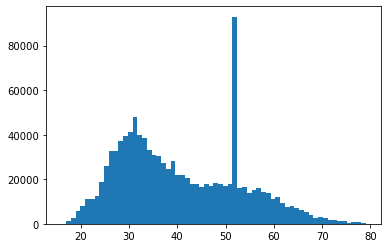

In [64]:
hist(res.age, weights = res.c, bins = len(res))

In [65]:
# For each age how many females and how many m and group by age

res = Q("""
SELECT
    age,
    SUM(CASE WHEN sex ='F' then 1 END) AS "F",
    SUM(CASE WHEN sex ='M' then 1 END) AS "M"
FROM
tripdata_cleaned
GROUP BY 1
""")

In [66]:
res.head()

,age,F,M
0,16,3,NaN
1,17,168,1086.0
2,18,519,2183.0
3,19,1228,4514.0
4,20,2038,5882.0


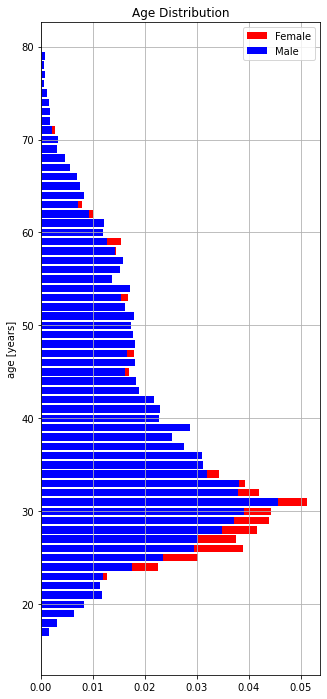

In [67]:
# creates a stacked bar 
# Probabilites is the x axis 

figure(figsize=(5,12))
barh(res.age, res.F/res.F.sum(), color = 'r', label = 'Female')
barh(res.age, res.M/res.M.sum(), color = 'b', label = 'Male')
title('Age Distribution')
ylabel('age [years]')
grid()
legend()

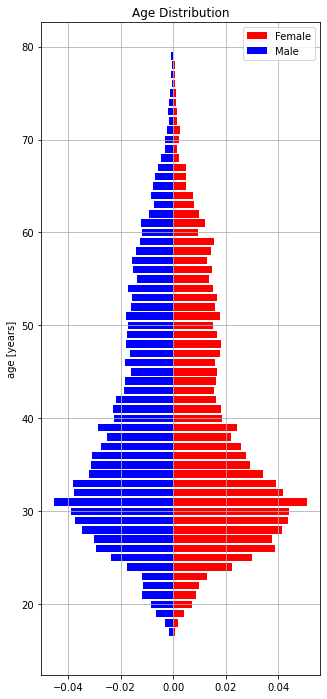

In [68]:
# create an horizontal bar graph compared gender againist each other. 


figure(figsize=(5,12))
barh(res.age, res.F/res.F.sum(), color = 'r', label = 'Female')
barh(res.age, -res.M/res.M.sum(), color = 'b', label = 'Male')
title('Age Distribution')
ylabel('age [years]')
grid()
legend()

In [69]:
# Daily: Customer = 24-hour pass or 3-day pass user
# How many subscribers/daily for each age

res = Q("""
SELECT
    age,
    SUM(CASE WHEN usertype = "Subscriber" THEN 1 END) AS s,
    SUM(CASE WHEN usertype != "Subscriber" THEN 1 END) AS d
FROM
    tripdata_cleaned
GROUP BY 1
""")
res.head()

,age,s,d
0,16,3,NaN
1,17,1011,243.0
2,18,2106,598.0
3,19,4151,1604.0
4,20,5647,2367.0


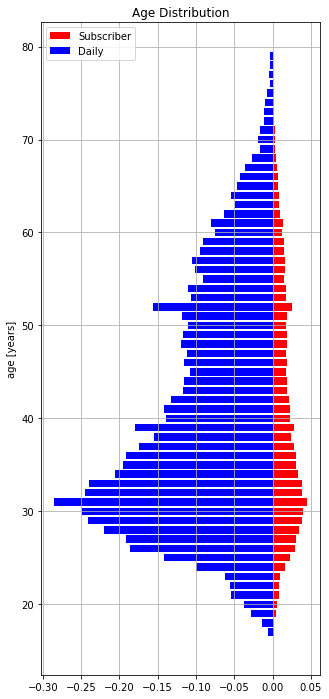

In [71]:
figure(figsize=(5,12))
barh(res.age, res.s/res.s.sum(), color = 'r', label = 'Subscriber')
barh(res.age, -res.s/res.d.sum(), color = 'b', label = 'Daily')
title('Age Distribution')
ylabel('age [years]')
grid()
legend()

In [72]:
# what is the duration for how many females and males 
# duration is in hours 

res =  Q ("""
SELECT
    tripduration / 60 as 'duration',
    SUM(CASE WHEN sex="F" then 1 end) as "F",
    SUM(CASE WHEN sex="M" then 1 end) as "M"
FROM
    tripdata_cleaned
GROUP BY 1
""")

In [73]:
res.head()

,duration,F,M
0,1,5719,25694
1,2,10846,40923
2,3,14933,50672
3,4,17452,54619
4,5,18049,53643


(0.0, 60.0)

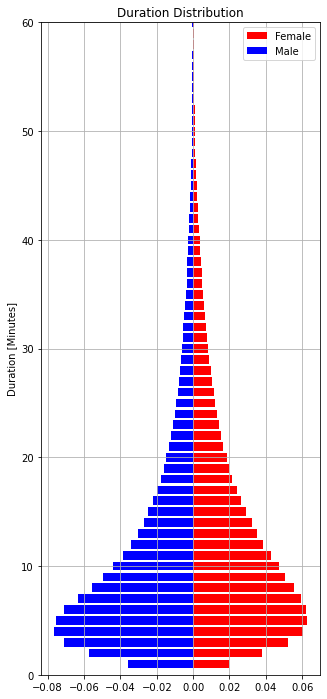

In [74]:
figure(figsize=(5,12))
barh(res.duration, res.F/res.F.sum(), color = 'r', label = 'Female')
barh(res.duration, -res.M/res.M.sum(), color = 'b', label = 'Male')
title('Duration Distribution')
ylabel('Duration [Minutes]')
grid()
legend()
ylim(0,60)

(0.0, 60.0)

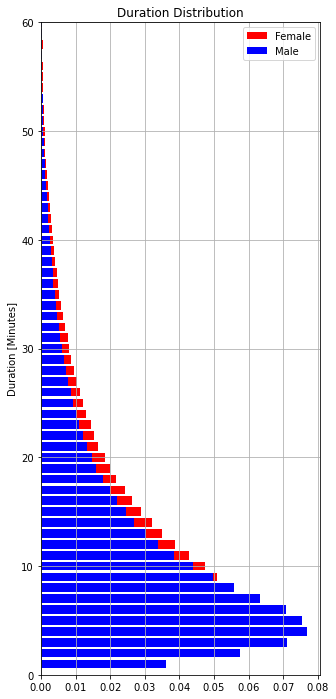

In [75]:
figure(figsize=(5,12))
barh(res.duration, res.F/res.F.sum(), color = 'r', label = 'Female')
barh(res.duration, res.M/res.M.sum(), color = 'b', label = 'Male')
title('Duration Distribution')
ylabel('Duration [Minutes]')
grid()
legend()
ylim(0,60)

### Results 
- Can see that the females are slightly younger in age on average and almost around 95,000 riders are at the age of 51. 
- More females ride between the ages of 24 and 31 while males ride more in overall. 
- Even though, males tend to have a higher avg trip duration overall. Females tend to ride for longer trip times. 
- We can tell that most people on the citibike are customers which are the 24-hour pass/3-day pass and we can assume that these customers are just visiting 

***

<a id='Eda7'></a>
# EDA 7. 
## Visualize locations

In [76]:
# Look at different stations being used. 

res = Q ("""
SELECT 
    start_station_name,
    start_station_latitude as lat,
    start_station_longitude as lon,
    count(*) as c
FROM
    tripdata_cleaned
GROUP BY 1,2,3
""")

res.head()

,start_station_name,lat,lon,c
0,1 Ave & E 110 St,40.792327,-73.938300,922
1,1 Ave & E 16 St,40.732219,-73.981656,3777
2,1 Ave & E 18 St,40.733812,-73.980544,3102
3,1 Ave & E 30 St,40.741444,-73.975361,3115
4,1 Ave & E 39 St,40.747140,-73.971130,3386


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  1.,  1.,  2.,  6., 12.,  9., 15., 23.,
        26., 18., 28., 20., 24., 28., 25., 27., 23., 26., 24., 23., 28.,
        25., 24., 21., 17., 18., 17., 16., 14., 25., 16., 16., 32., 30.,
        30., 29., 26., 24., 19., 23., 20., 16., 13., 12., 10.,  9., 12.,
        12., 13., 16., 16., 15., 22., 17., 24., 25., 21., 22., 22., 22.,
        20., 19., 13.,  8.,  5.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([40.6  , 40.603, 40.606, 40.609, 40.612, 40.615, 40.618, 40.621,
        40.624, 40.627, 40.63 , 40.633, 40.636, 40.639, 40.642, 40.645,
        40.648, 40.651, 40.654, 40.657, 40.66 , 40.663, 40.666, 40.669,
        40.672, 40.675, 40.678, 40.681, 40.684, 40.687, 40.69 , 40.693,
        40.696, 40.699, 40.702, 40.705, 40.708, 40.711, 40.714, 40.717,
        40.72 , 40.723, 40.726, 40.729, 40.732, 40.735, 40.738, 40.741,
  

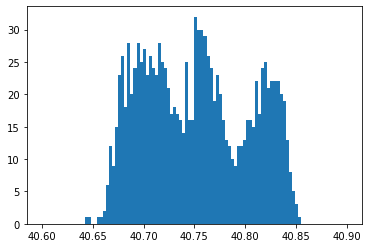

In [77]:
# Histogram
# Looked at the data to see the ranges of lat and lon

hist(res.lat, range=(40.6, 40.9), bins=100)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  3.,  7., 14., 27., 22., 24., 27., 25., 34., 44., 38., 35.,
        38., 43., 28., 32., 20., 22., 27., 30., 36., 40., 35., 43., 35.,
        42., 35., 44., 23., 21., 35., 29., 21., 40., 33., 34., 32., 27.,
        22., 12., 10.,  7.,  7., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-74.1  , -74.097, -74.094, -74.091, -74.088, -74.085, -74.082,
        -74.079, -74.076, -74.073, -74.07 , -74.067, -74.064, -74.061,
        -74.058, -74.055, -74.052, -74.049, -74.046, -74.043, -74.04 ,
        -74.037, -74.034, -74.031, -74.028, -74.025, -74.022, -74.019,
        -74.016, -74.013, -74.01 , -74.007, -74.004, -74.001, -73.998,
        -73.995, -73.992, -73.989, -73.986, -73.983, -73.98 , -73.977,
        

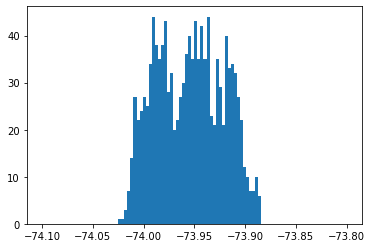

In [78]:
# Very clear where all the stations are located 

hist(res.lon, range=(-74.1, -73.8), bins=100)

(40.6, 40.87)

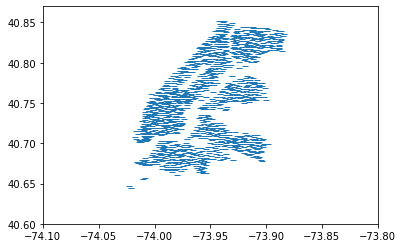

In [79]:
plot(res.lon, res.lat, '_')
xlim(-74.1, -73.8)
ylim(40.6,40.87)

(40.65, 40.86)

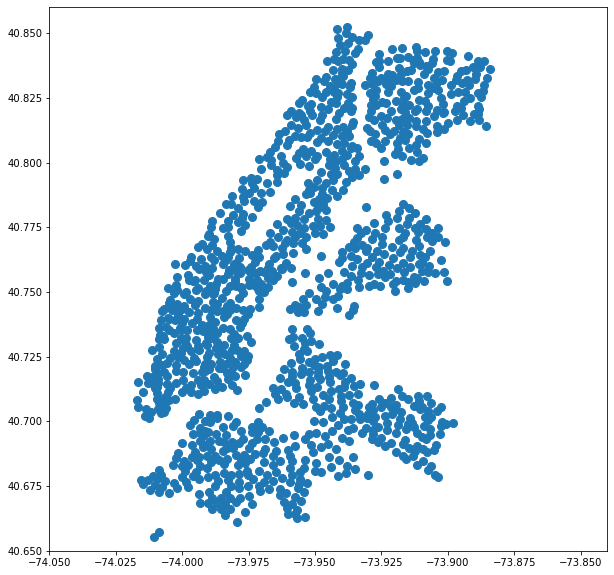

In [80]:
# Can see Manhatan, brooklyn, queens

figure(figsize=(10,10))
xstart = -74.05
ystart = 40.65
extent = .21
plot(res.lon, res.lat, 'o',ms=8)
xlim(xstart, xstart+extent)
ylim(ystart,ystart+extent)

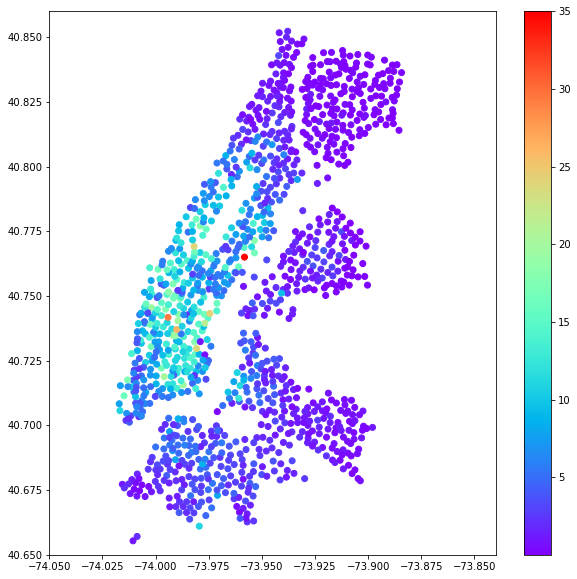

In [81]:
# Use color as marker

figure(figsize=(10,10))
xstart = -74.05
ystart = 40.65
extent = .21
scatter(res.lon, res.lat, c=35*res.c / res.c.max(), cmap = 'rainbow')
xlim(xstart, xstart+extent)
ylim(ystart,ystart+extent)
colorbar()

In [82]:
# Can make into function 
# Use both size and color as markers 



def my_plot (x, y, s, c, max_size=50):
    figure(figsize=(10,10))
    xstart = -74.05
    ystart = 40.65
    extent = .21
    scatter(x, y, s = max_size*s / max(s), c=c, cmap = 'rainbow')
    xlim(xstart, xstart+extent)
    ylim(ystart,ystart+extent)
    colorbar()

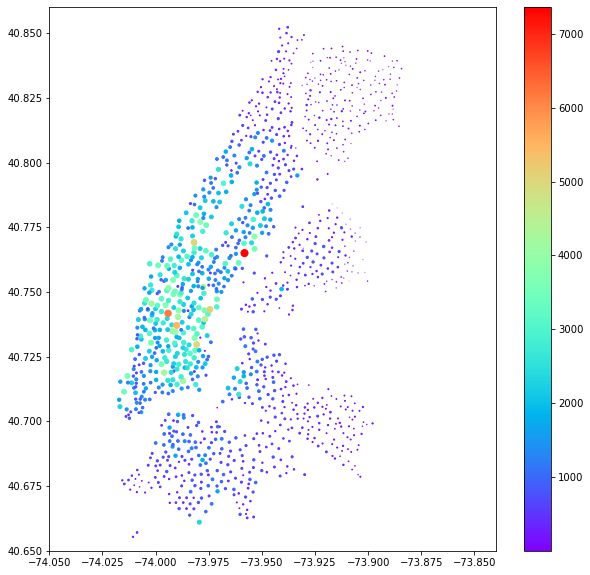

In [83]:
my_plot(res.lon,res.lat,res.c,res.c)

In [95]:
# Group by station 
# calculating avg trip duration 
# And how many males and females 


res = Q ("""
SELECT
    start_station_name,
    start_station_latitude as lat,
    start_station_longitude as lon,
    avg(tripduration) as d,
    SUM(CASE WHEN sex="F" THEN 1 end) as "F",
    SUM(CASE WHEN sex="M" THEN 1 end) as "M"
FROM
    tripdata_cleaned
GROUP BY 1,2,3
ORDER BY 4 DESC
""")

In [97]:
res.head()

,start_station_name,lat,lon,d,F,M
0,W 181 St & Riverside Dr,40.851680,-73.941860,1852.570213,65.0,141
1,Somers St & Broadway,40.679450,-73.904740,1840.268293,9.0,17
2,57 St & 1 Ave - Brooklyn Army Terminal Vaccina...,40.646377,-74.023087,1749.500000,NaN,5
3,39 St & 2 Ave,40.655400,-74.010628,1651.101770,53.0,132
4,Bronx Shore Comfort Station,40.800460,-73.924040,1607.763441,27.0,51


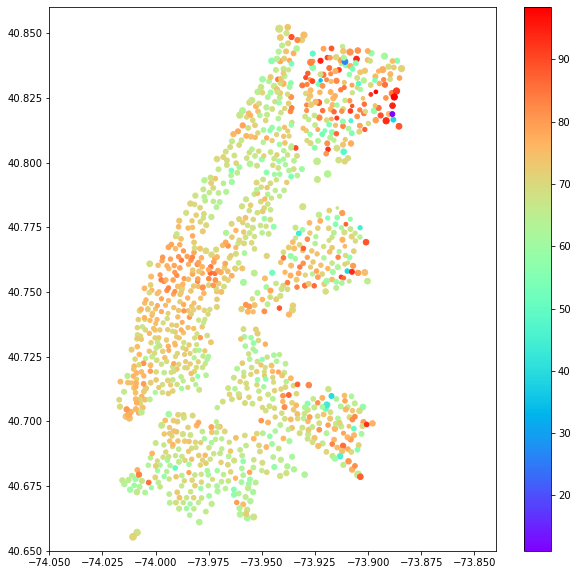

In [87]:
# duration is the size marker 
# Gender is the color marker 
# the bigger the size the more duration 
# Female to male ratio - More males is red, the bluer is less males: Meaning more females may ride at that location 

my_plot(res.lon,res.lat,res.d,100*res.M / (res.M+res.F))

In [89]:
# Avg age for females and males at each location 


res = Q ("""
SELECT
    start_station_name,
    start_station_latitude as lat,
    start_station_longitude as lon,
    AVG(CASE WHEN sex="F" THEN age end) as "F",
    AVG(CASE WHEN sex="M" THEN age end) as "M"
FROM
    tripdata_cleaned
GROUP BY 1,2,3
""")

res.head()

,start_station_name,lat,lon,F,M
0,1 Ave & E 110 St,40.792327,-73.938300,37.179825,38.467213
1,1 Ave & E 16 St,40.732219,-73.981656,40.121382,39.320303
2,1 Ave & E 18 St,40.733812,-73.980544,40.539767,39.035105
3,1 Ave & E 30 St,40.741444,-73.975361,37.638372,38.390700
4,1 Ave & E 39 St,40.747140,-73.971130,39.567661,39.425578


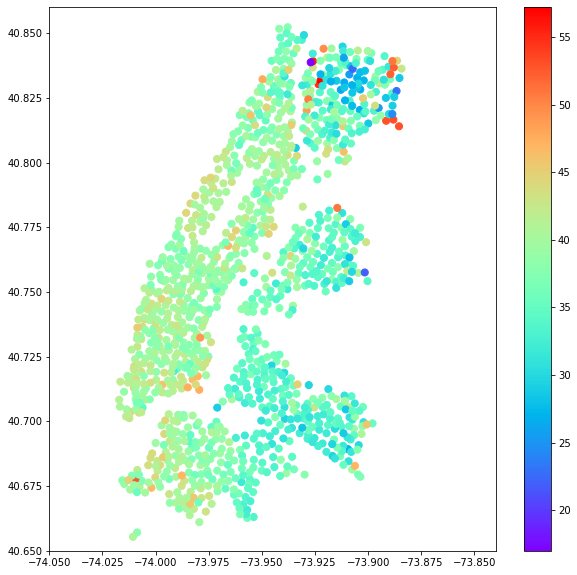

In [90]:
# Red means the age increases for females 

my_plot(res.lon,res.lat,res.F*0+1, res.F)

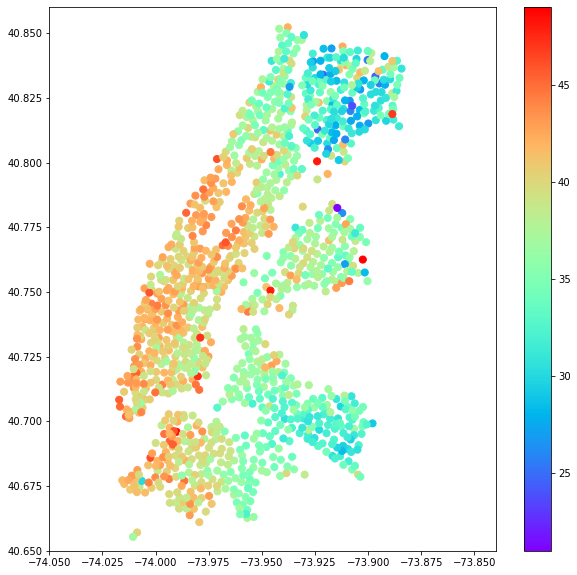

In [91]:
# The more red the higher the age for male

my_plot(res.lon,res.lat,res.M*0+1, res.M)

In [110]:
# Let's take a look at the amount of males vs females at each location

res = Q ("""
SELECT
    start_station_name,
    start_station_latitude as lat,
    start_station_longitude as lon,
    SUM(CASE WHEN sex="F" THEN 1 end) as "F",
    SUM(CASE WHEN sex="M" THEN 1 end) as "M"
FROM
    tripdata_cleaned
GROUP BY 1,2,3
ORDER BY 5 DESC
""")

res.head()

,start_station_name,lat,lon,F,M
0,1 Ave & E 68 St,40.765005,-73.958185,2680.0,4393
1,W 21 St & 6 Ave,40.741740,-73.994156,1666.0,4212
2,E 17 St & Broadway,40.737050,-73.990093,1427.0,3720
3,Pershing Square North,40.751873,-73.977706,694.0,3348
4,Broadway & W 60 St,40.769155,-73.981918,1281.0,3337


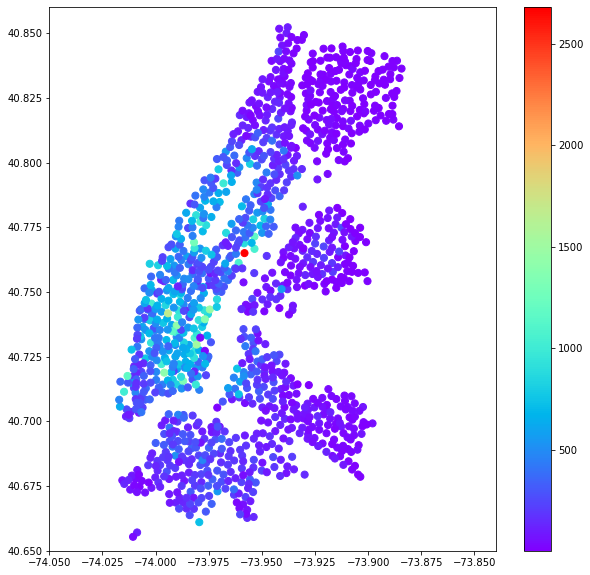

In [107]:
# Taking a look at the amount of female riders in NY. 

my_plot(res.lon,res.lat,res.F*0+1, res.F)

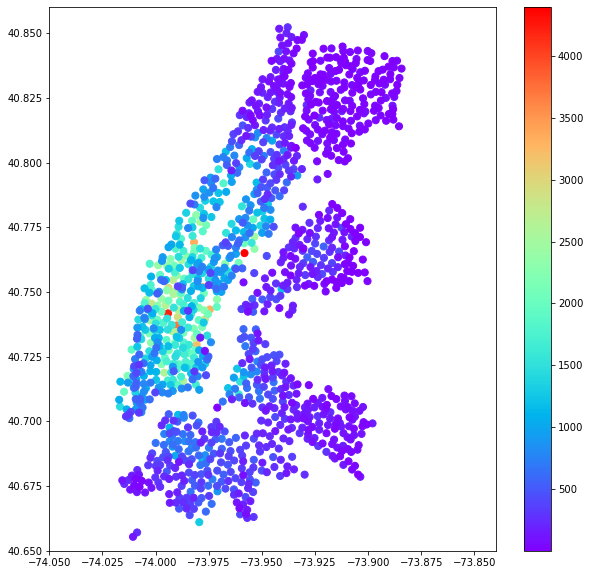

In [111]:
# Taking a look at the amount of male riders in NY.

my_plot(res.lon,res.lat,res.M*0+1, res.M)

# Results 
- We can see how people use their bikes in each part of the city 
- We can quickly reveal that the lower east side of Manhattan is heavily used and the less fequent the bikes are used as we go towards the upper west side.
- start station W 181 St & Riverside Dr. shows the highest trip duration which makes sense because places like Yankee Staduim, Brooklyn bridge, airports are near by. 
- Higher trip durations seem to in the Bronx area which makes sense because ceratin places may be further to get too. 
- We can see as the age increases in males the more they tend to ride in the Manhattan area. 
- Also, we can see an increase of male riders between lower east side to midtown east.

***

<a id='Conclusion'></a>
# The Conclusion:

Looking at some of the analysis we did within this bike set we can see a lot of interesting insights: 
- We notice that there are some start stations that only have male riders starting from. 
- Which can help us understand why their are a significant higher amount of male riders using the citi bikes. 
- When we look at the trip duration we can notice that most of the bikes are used for less than a hour. Which means people tend to use the bikes only for local/short rides. Which goes along with why there is a much higher rate of subscribers compared to customers.  
- Most of us probably made the assumption that the city would have the most rides which this analysis proved right in Manhattan. Also, the further out the riders are from the city leads to longer bike rides. 
- Most of the people riding are above the age of 30 which we can assume that these are the working adults trying to stay healthy or avoid traffic. 

For next time: 
- We can try to analyze the riders that decide not to put their gender in 
- We can do some research on the areas to try and determine why there are only males at some stations. 
- We do an analysis on the end station names to determine where people usually end their ride at. 